### 凸类

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [12]:
nb_samples = 1000
X,_ = make_blobs(n_samples=nb_samples,n_features=2,centers=3,cluster_std=1.5)

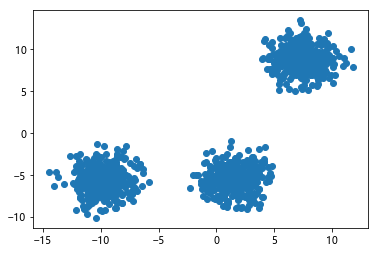

In [13]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(X)
print(km.cluster_centers_)

[[-9.83360964 -5.69365503]
 [ 7.39694518  8.75802868]
 [ 1.46118512 -5.48214042]]


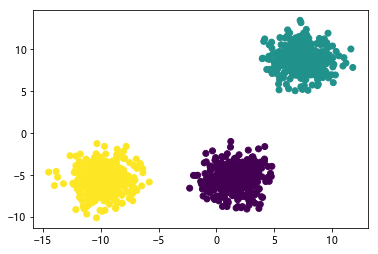

In [15]:
y_pred = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

### 同心圆情况

In [6]:
from sklearn.datasets import make_circles

nb_samples=1000
X,Y = make_circles(n_samples=nb_samples,noise=0.05)

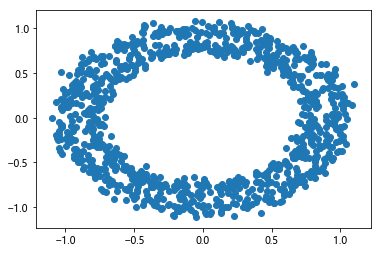

In [7]:
# print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

+ 按照原方法分类得到的结果如下

In [8]:
km = KMeans(n_clusters=2)
km.fit(X)
print(km.cluster_centers_)

[[ 0.51665451  0.24918851]
 [-0.51818498 -0.25553668]]


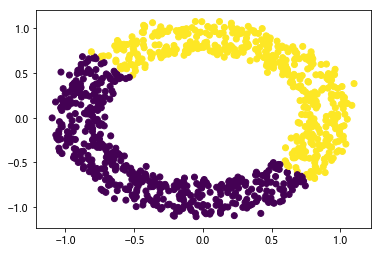

In [9]:
y_pred = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

### 1.惯性优化（等价于寻找曲率最大的位置）

In [16]:
inertias = []
for n in range(2,10):
    km = KMeans(n_clusters=n)
    km.fit(X)
    inertias.append(km.inertia_)

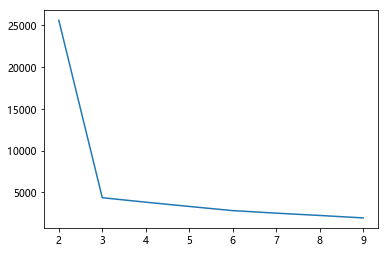

In [17]:
plt.plot(range(2,10),inertias)
plt.show()

### 2.轮廓分数

In [18]:
from sklearn.metrics import silhouette_score

nb_clusters = [2,3,4,5,6,7,8,9,10]
avg_silhouettes=[]
for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    avg_silhouettes.append(silhouette_score(X,Y))

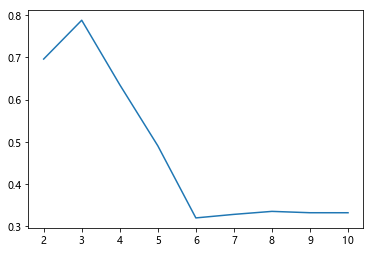

In [19]:
plt.plot(nb_clusters,avg_silhouettes)
plt.show()

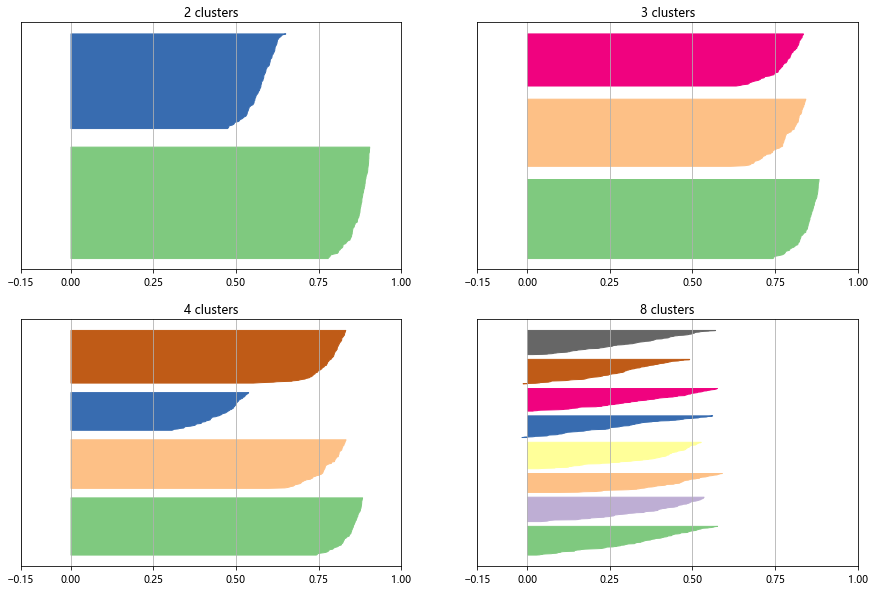

In [32]:
## 排序分数
from  sklearn.metrics import silhouette_samples
from matplotlib import cm
import numpy as np

fig,ax = plt.subplots(2,2,figsize=(15,10))

nb_clusters = [2,3,4,8]
mapping = [(0,0),(0,1),(1,0),(1,1)]

for i,n in enumerate(nb_clusters):
    km = KMeans(n_clusters=n)
    labels = km.fit_predict(X)
    
    silhouette_values = silhouette_samples(X,labels)
#     print(len(silhouette_values),len(labels))
    ax[mapping[i]].set_xticks([-0.15,0.0,0.25,0.5,0.75,1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' %n)
    ax[mapping[i]].set_xlim([-0.15,1])
    ax[mapping[i]].grid()
    y_lower = 20
    
#     print(n)
    for t in range(n):
        ct_values = silhouette_values[Y==t]
#         print(ct_values.shape)
        ct_values.sort()
        y_upper = y_lower+ct_values.shape[0]
        
        color = cm.Accent(float(t)/n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower,y_upper),0,ct_values,facecolor=color,edgecolor=color)
        y_lower = y_upper+20

### 3.类的不稳定性

In [33]:
nb_noisy_datasets = 4

X_noise = []

for _ in range(nb_noisy_datasets):
    Xn = np.ndarray(shape=(1000,2))
    for i,x in enumerate(X):
        if np.random.uniform(0,1)<0.25:
            Xn[i] = X[i]+np.random.uniform(-2.0,2.0)
        else:
            Xn[i] = X[i]
    X_noise.append(Xn)

In [34]:
print(X_noise)

[array([[-11.69818205,  -6.69933776],
       [ -8.89590519,  -6.87255341],
       [  9.60168999,   8.59318024],
       ...,
       [  0.24183479,  -3.6801547 ],
       [  5.13591406,   8.38020902],
       [  7.24893468,  10.62687967]]), array([[-11.69818205,  -6.69933776],
       [ -9.04641229,  -7.02306051],
       [  9.60168999,   8.59318024],
       ...,
       [ -0.02458957,  -3.94657905],
       [  5.13591406,   8.38020902],
       [  7.24893468,  10.62687967]]), array([[-11.69818205,  -6.69933776],
       [ -9.04641229,  -7.02306051],
       [ 10.32051872,   9.31200897],
       ...,
       [ -0.02458957,  -3.94657905],
       [  4.80103752,   8.04533248],
       [  9.12057657,  12.49852156]]), array([[-11.69818205,  -6.69933776],
       [ -9.56147033,  -7.53811855],
       [  9.60168999,   8.59318024],
       ...,
       [ -0.02458957,  -3.94657905],
       [  5.13591406,   8.38020902],
       [  7.24893468,  10.62687967]])]


In [51]:
from sklearn.metrics.pairwise import pairwise_distances

instabilities = []
nb_clusters = range(2,11)
for n in nb_clusters:
    Yn = []
    for Xn in X_noise:
        km = KMeans(n_clusters = n)
        Yn.append(km.fit_predict(Xn))
    distances = []
    for i in range(len(Yn)-1):
        for j in range(i,len(Yn)):
            d = pairwise_distances(Yn[i].reshape(-1,1),Yn[j].reshape(-1,1),'hamming')
            distances.append(d[0,0])
        instability = (2.0*np.sum(distances))/float(nb_noisy_datasets**2)
        instabilities.append(instability)

range(2, 11) [0.25, 0.5, 0.5, 0.125, 0.375, 0.375, 0.25, 0.5, 0.625, 0.375, 0.5, 0.625, 0.375, 0.625, 0.75, 0.375, 0.5, 0.625, 0.25, 0.5, 0.625, 0.125, 0.25, 0.375, 0.375, 0.625, 0.75]


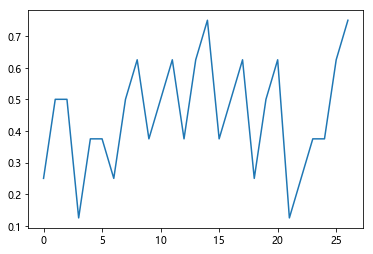

In [55]:
print(nb_clusters,instabilities)
plt.plot(range(len(instabilities)),instabilities)
plt.show()